In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

G:\himanshu\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

y = 2 Pullover


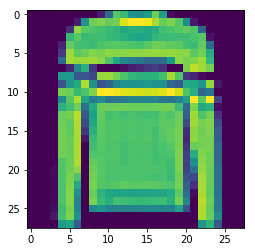

In [3]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5

label_index = y_train[img_index]

print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

plt.imshow(x_train[img_index])

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [5]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape,'\n')

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) 
y_train shape: (55000, 10) 

55000 train set
5000 validation set
10000 test set


In [6]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W0706 18:42:15.049141 10736 deprecation.py:506] From C:\Users\HIMANSHU JAIN\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [8]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 116s 2ms/sample - loss: 0.6140 - acc: 0.7727 - val_loss: 0.3894 - val_acc: 0.8626
Epoch 2/10
55000/55000 [==============================] - 113s 2ms/sample - loss: 0.4303 - acc: 0.8435 - val_loss: 0.3368 - val_acc: 0.8796
Epoch 3/10
55000/55000 [==============================] - 113s 2ms/sample - loss: 0.3805 - acc: 0.8614 - val_loss: 0.3035 - val_acc: 0.8916
Epoch 4/10
55000/55000 [==============================] - 114s 2ms/sample - loss: 0.3544 - acc: 0.8706 - val_loss: 0.2731 - val_acc: 0.8990
Epoch 5/10
55000/55000 [==============================] - 112s 2ms/sample - loss: 0.3335 - acc: 0.8782 - val_loss: 0.2648 - val_acc: 0.9048
Epoch 6/10
55000/55000 [==============================] - 113s 2ms/sample - loss: 0.3180 - acc: 0.8820 - val_loss: 0.2505 - val_acc: 0.9062
Epoch 7/10
55000/55000 [==============================] - 112s 2ms/sample - loss: 0.3009 - acc: 0.8878 - val_lo

In [9]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

In [10]:
# Print test accuracy
print('Test accuracy:', score[1])

Test accuracy: 0.9102


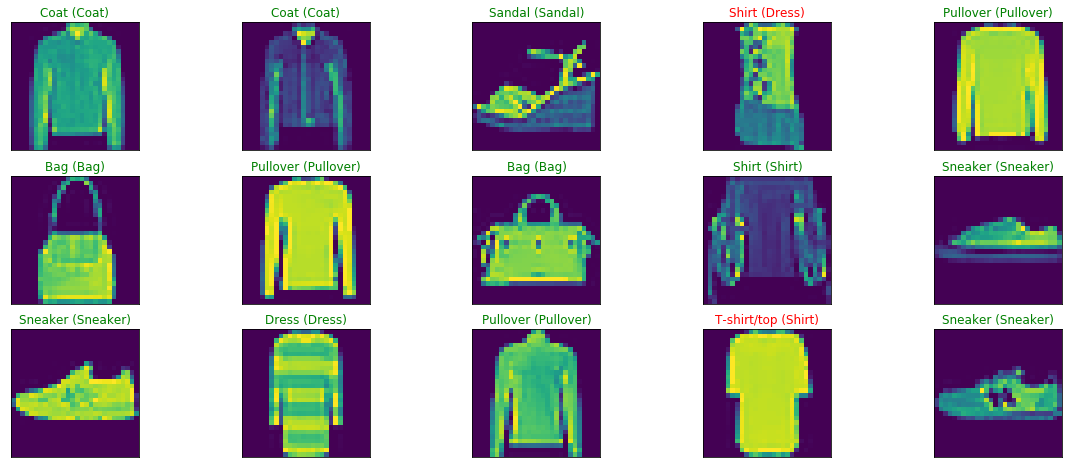

In [11]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))